In [19]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from collections import OrderedDict, defaultdict
from scipy.stats import pearsonr
from matplotlib.pyplot import figure
from data_cleaning.health_data_cleaning import *
from data_cleaning.income_inequality_data_cleaning import *
from data_cleaning.health_sanitation_data_cleaning import *
from data_cleaning.energy_data_cleaning import *
from data_cleaning.education_data_cleaning import *
import warnings
warnings.filterwarnings('ignore')

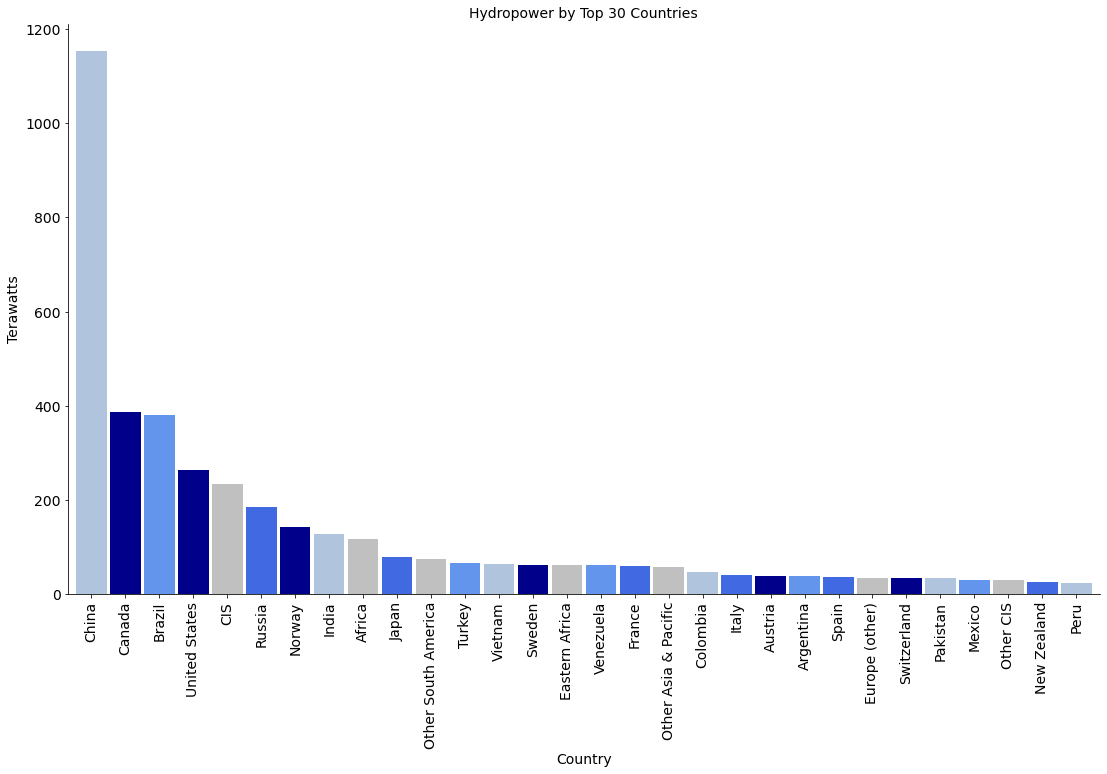

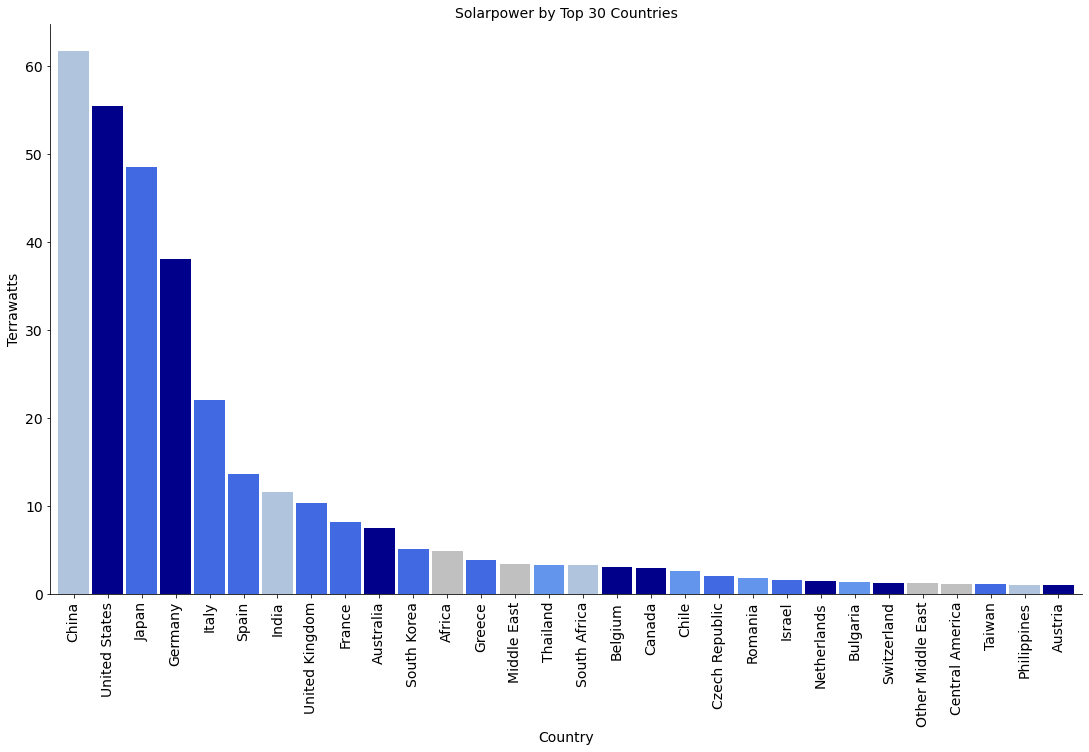

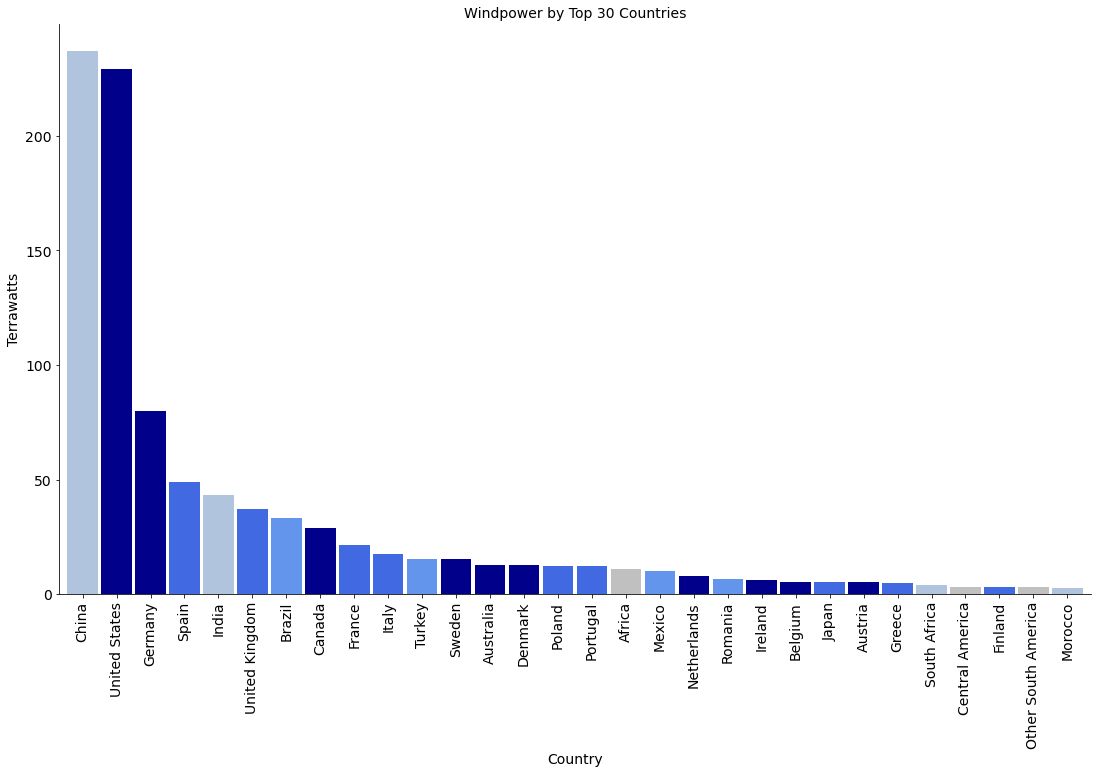

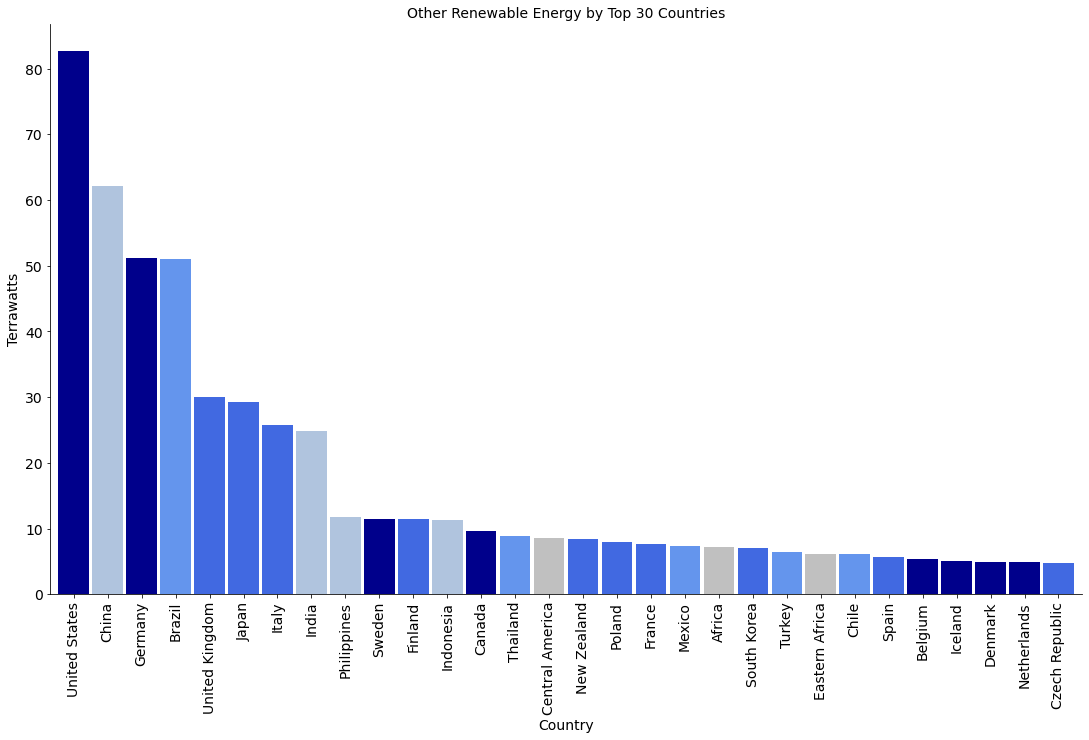

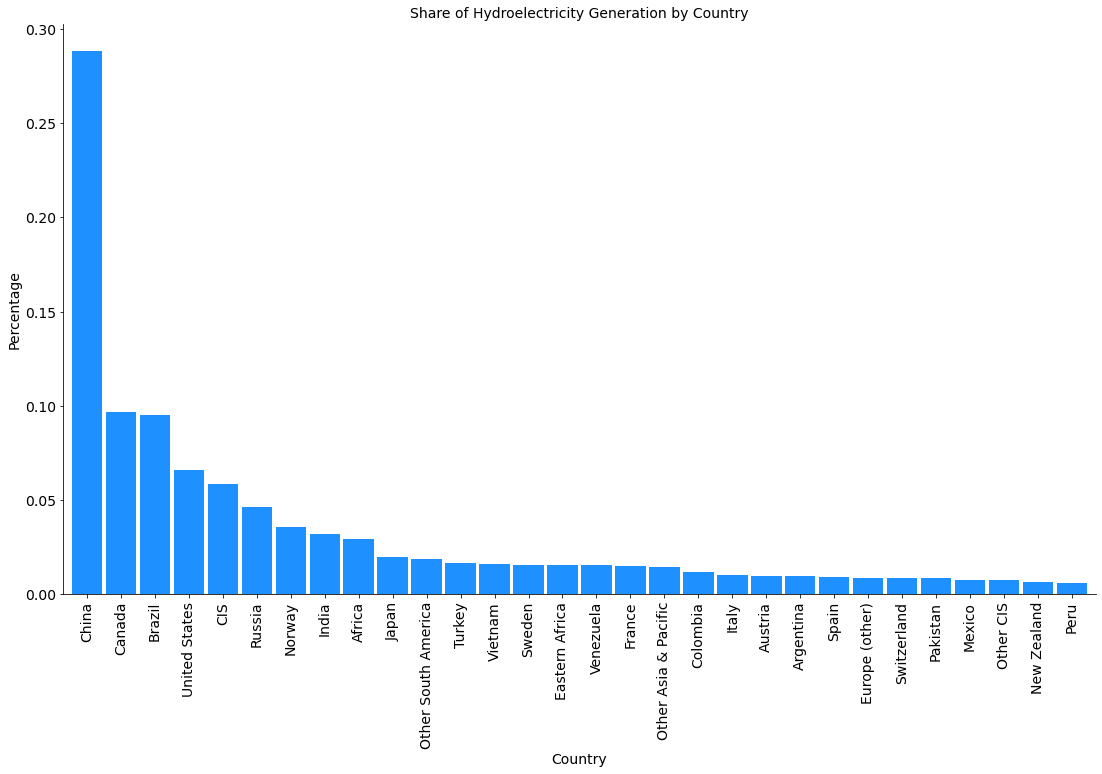

In [20]:
# Analysis 1: Renewable Energy vs. GDP

filename_1 = 'datasets/energy.csv'
filename_2 = 'datasets/GDP_2016.csv'
data = energy_data_clean(filename_1, filename_2)
leg = ['75% percentile in GDP','50% percentile in GDP','75% percentile in GDP','Top 25% percentile in GDP',
       'No Data Available']

m = ['Year','Hydropower (terawatt-hours)','Solar (terawatt-hours)','Wind (terawatt-hours)',
     'Other renewables (terawatt-hours)','Economy (GDP per Capita)']

#### Hydro
hydro = data.sort_values('Hydropower (terawatt-hours)', ascending = False).head(30)
ax = hydro.plot.bar(x='Country',  y=m[1], width=0.9, rot=90, color = hydro['color_code'])
ax.legend(leg)
ax.get_legend().remove()
plt.ylabel("Terawatts")
plt.xlabel("Country")
plt.title("Hydropower by Top 30 Countries")
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.show()

#### solar
solar = data.sort_values('Solar (terawatt-hours)', ascending = False).head(30)
ax = solar.plot.bar(x='Country',  y=m[2], width=0.9, rot=90, color = solar['color_code'])
ax.legend(leg)
ax.get_legend().remove()
plt.ylabel("Terrawatts")
plt.xlabel("Country")
plt.title("Solarpower by Top 30 Countries")
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.show()

#### Wind
wind = data.sort_values('Wind (terawatt-hours)', ascending = False).head(30)
ax = wind.plot.bar(x='Country',  y=m[3], width=0.9, rot=90, color = wind['color_code'])
ax.legend(leg)
ax.get_legend().remove()
plt.ylabel("Terrawatts")
plt.xlabel("Country")
plt.title("Windpower by Top 30 Countries")
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.show()

#### Other
Other = data.sort_values('Other renewables (terawatt-hours)', ascending = False).head(30)
ax = Other.plot.bar(x='Country',  y=m[4], width=0.9, rot=90, color = Other['color_code'])
ax.legend(leg)
ax.get_legend().remove()
plt.ylabel("Terrawatts")
plt.xlabel("Country")
plt.title("Other Renewable Energy by Top 30 Countries")
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.show()

#Share of Electricity by top Countries
h2 = hydro[['Country','Hydropower (terawatt-hours)']]
the_sum = h2['Hydropower (terawatt-hours)'].sum()
h2['percentage'] = h2['Hydropower (terawatt-hours)']/the_sum

ax = h2.plot.bar(x='Country',  y='percentage', width=0.9, rot=90, color = 'dodgerblue')
ax.legend(leg)
ax.get_legend().remove()
plt.ylabel("Percentage")
plt.xlabel("Country")
plt.title("Share of Hydroelectricity Generation by Country")
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.show()

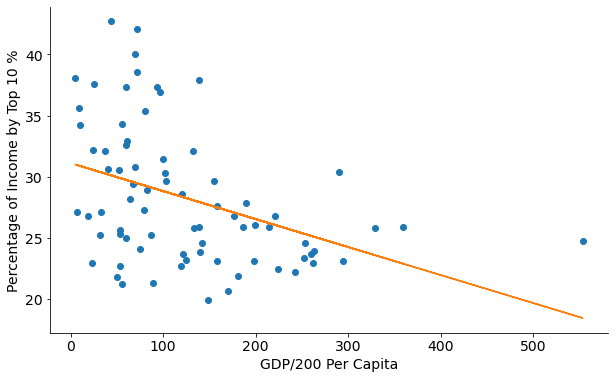

In [21]:
# Analysis 2: Income equality vs GDP

file_name = 'datasets/income_inequality.csv'
# data cleaning using helper function
income_df = income_inequality_data_clean(file_name)

x = income_df['GDP Per Capita']
y = income_df['Income of Top 10%']
m, b = np.polyfit(x, y, 1)

fig, ax = plt.subplots(figsize=(10,6))
ax.set_xlabel('GDP/200 Per Capita')
ax.set_ylabel('Percentage of Income by Top 10 %')

# plotting income disparity vs gdp per capita
plt.plot(x, y, 'o')
plt.plot(x, m*x + b)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

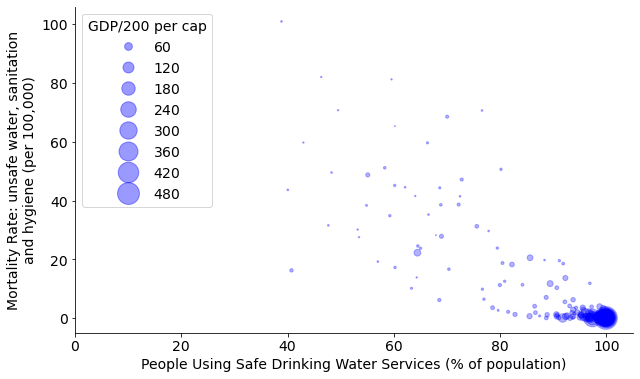

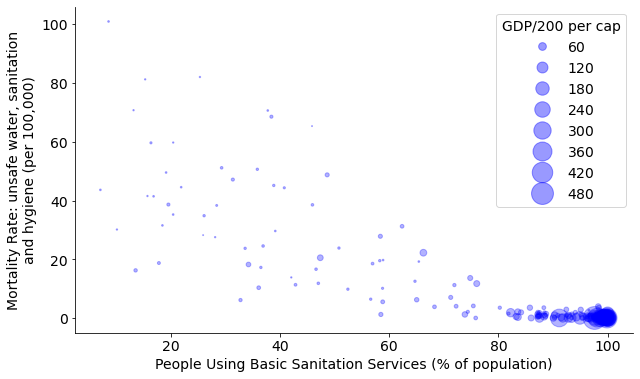

In [22]:
# Analysis 3: Access to water and sanitation services vs mortality vs gdp

# Obtain data from Git
file_name = 'datasets/health_water_sanitation.csv'

# Get cleaned dataframe for the analysis
health_sanitation_df = health_sanitation_data_clean(file_name)

# Creating plots

# Data of interest:
w = health_sanitation_df['GDP_per_capita']
x = health_sanitation_df['basic_sanitation_access']
y = health_sanitation_df['mortality_rate_unsafe_water_sanitation_hygiene']
z = health_sanitation_df['basic_water_access']

SMALL_SIZE = 14

# Part 1: Water access vs mortality
fig, ax = plt.subplots(figsize=(10,6))

ax.set_xlabel("People Using Safe Drinking Water Services (% of population)", size=14)
ax.set_ylabel("Mortality Rate: unsafe water, sanitation" + "\n" + "and hygiene (per 100,000)", size=14)

plo = plt.scatter(z, y, c='blue', s=w, alpha=0.3)
plt.rcParams["legend.framealpha"] = 0.8
plt.xlim([0, 105])

handles, labels = plo.legend_elements(prop='sizes', alpha=0.4,color='blue')
legend = ax.legend(handles, labels, loc="upper left", title="GDP/200 per cap")
plt.rc('font', size=SMALL_SIZE)
plt.rc('axes', titlesize=SMALL_SIZE)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Part 2: Sanitation access vs mortality
fig, ax = plt.subplots(figsize=(10,6))

ax.set_xlabel("People Using Basic Sanitation Services (% of population)", size=14)
ax.set_ylabel("Mortality Rate: unsafe water, sanitation" + "\n" + "and hygiene (per 100,000)", size=14)

plo = plt.scatter(x, y, c='blue', s=w, alpha=0.3)

handles, labels = plo.legend_elements(prop='sizes', alpha=0.4,color='blue')
legend = ax.legend(handles, labels, loc="upper right", title="GDP/200 per cap")
plt.rc('font', size=SMALL_SIZE)
plt.rc('axes', titlesize=SMALL_SIZE)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
            

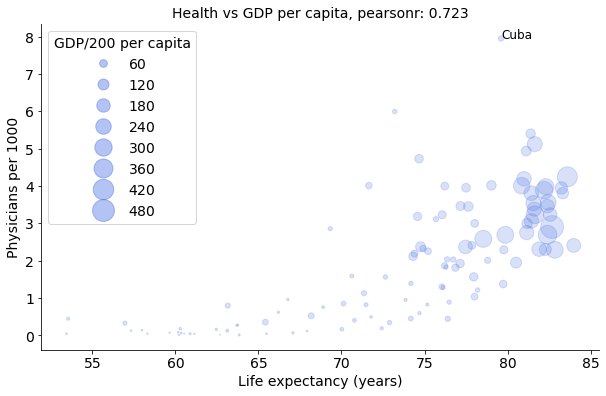

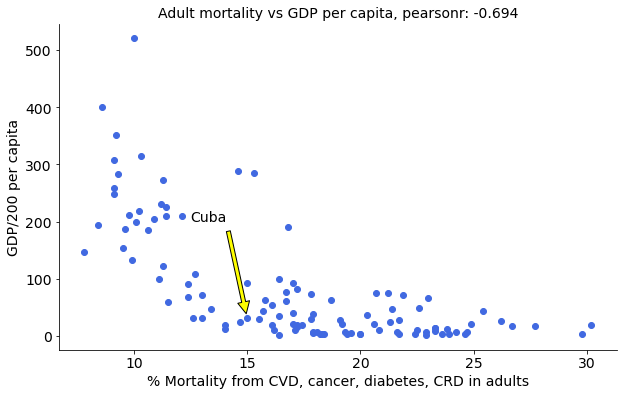

In [23]:
# Analysis 4:  Health vs GDP

file_name = 'datasets/health.csv'
color = 'royalblue'
# data cleaning using helper function
new_df = health_data_clean(file_name)


# Bubble plot (Physicians vs Life expectancy vs GDP per capita)
fig, ax = plt.subplots(figsize=(10,6))
sc = ax.scatter('life_expectancy', 'Physicians_per_1000', s = 'GDP_per_capita',alpha = 0.2,data=new_df,c=color)
t = new_df.iloc[new_df['Physicians_per_1000'].idxmax()]
# Marking Cuba for case study
ax.annotate('Cuba',(t[0],t[1]),color = 'black',size = 12)
handles, labels = sc.legend_elements(prop="sizes", alpha=0.4,color=color)
legend = ax.legend(handles, labels, loc="upper left", title="GDP/200 per capita")
ax.set_xlabel("Life expectancy (years)", size=14)
ax.set_ylabel("Physicians per 1000", size=14)
ax.set_title('Health vs GDP per capita, '+'pearsonr: ' + 
             '%.3f'%(new_df['life_expectancy'].corr(new_df['Physicians_per_1000'])),size = 14)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

# Scatterplot between GDP per cpatia and Mortality rate
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter('mortality','GDP_per_capita' ,data=new_df,color = color)
t = new_df.iloc[new_df['Physicians_per_1000'].idxmax()]
# amrking Cuba for case study
ax.annotate('Cuba',(t[3],t[2]),color = 'black',size = 14,xytext =(12.5, 200), arrowprops = dict(facecolor ='yellow', shrink = 0.05))
ax.set_xlabel("% Mortality from CVD, cancer, diabetes, CRD in adults", size=14)
ax.set_ylabel("GDP/200 per capita", size=14)
ax.set_title('Adult mortality vs GDP per capita, '+'pearsonr: ' + 
             '%.3f'%(new_df['mortality'].corr(new_df['GDP_per_capita'])),size = 14)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

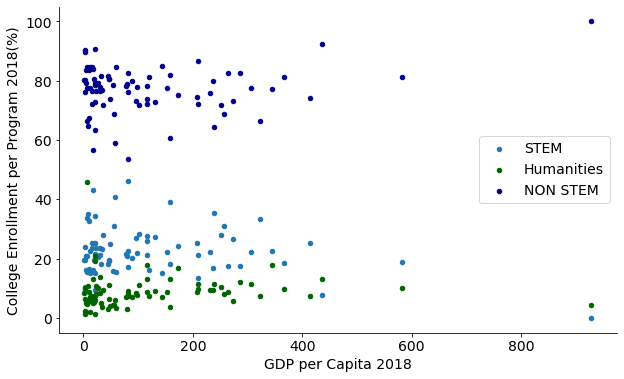

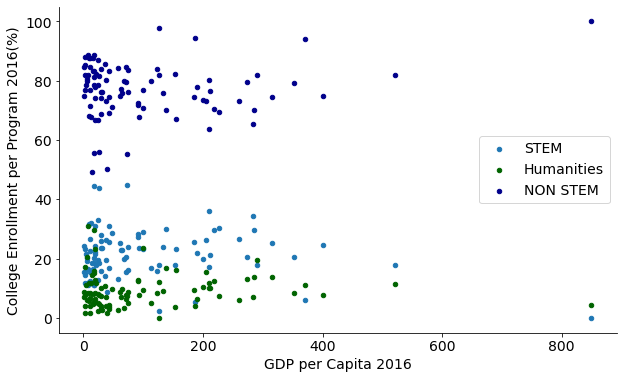

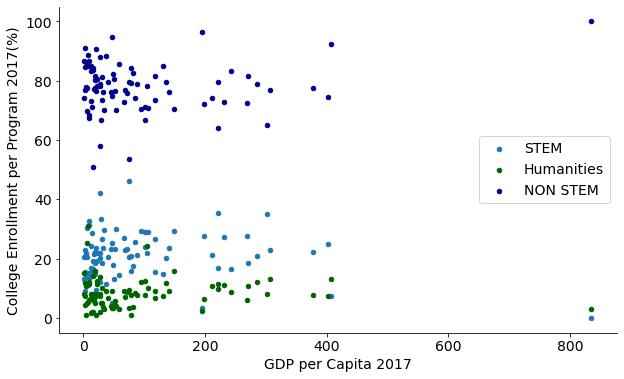

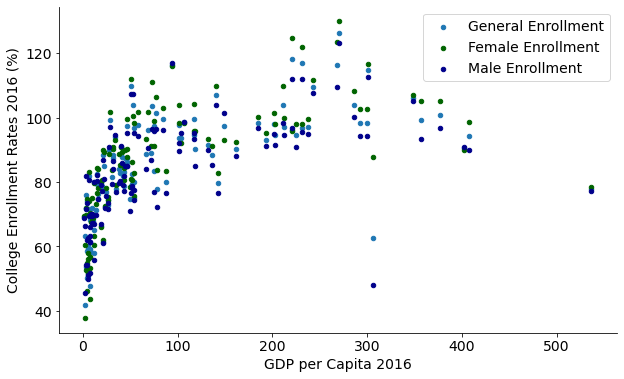

In [24]:
# Analysis 5: Education vs GDP

file_name = 'datasets/education.csv'
program_gdp, program_gdp_2016, program_gdp_2018, ger_gdp = education_data_clean(file_name)

# Plot 1
ax33 = program_gdp_2018.plot.scatter(x='GDP_2018', y='STEM_2018', label='STEM', figsize=(10,6))

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

ax44 = program_gdp_2018.plot.scatter(x='GDP_2018', y='HUM_2018', c='DarkGreen', label='Humanities',ax=ax33)

ax55= program_gdp_2018.plot.scatter(x='GDP_2018', y='NOT_STEM_2018', c='DarkBlue', label='NON STEM', ax=ax33)

ax33.set_xlabel("GDP per Capita 2018")
ax33.set_ylabel("College Enrollment per Program 2018(%)")
plt.show()

# Plot 2
ax333 = program_gdp_2016.plot.scatter(x='GDP_2016', y='STEM_2016', label='STEM',figsize=(10,6))

ax444 = program_gdp_2016.plot.scatter(x='GDP_2016', y='HUM_2016', c='DarkGreen', label='Humanities',ax=ax333)

ax555= program_gdp_2016.plot.scatter(x='GDP_2016', y='NOT_STEM_2016', c='DarkBlue', label='NON STEM', ax=ax333)

ax333.set_xlabel("GDP per Capita 2016")
ax333.set_ylabel("College Enrollment per Program 2016(%)")

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

# Plot 3
ax3 = program_gdp.plot.scatter(x='GDP_2017', y='STEM_2017', label='STEM', figsize=(10,6))

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

ax4 = program_gdp.plot.scatter(x='GDP_2017', y='HUM_2017', c='DarkGreen', label='Humanities',ax=ax3)


ax5= program_gdp.plot.scatter(x='GDP_2017', y='NOT_STEM_2017', c='DarkBlue', label='NON STEM', ax=ax3)

ax3.set_xlabel("GDP per Capita 2017")
ax3.set_ylabel("College Enrollment per Program 2017(%)")

ger_gdp['GER_2017']= ger_gdp['GER_2017'].astype(float)
ger_gdp['GER_female_2017']= ger_gdp[ 'GER_female_2017'].astype(float)
ger_gdp['GER_male_2017']= ger_gdp['GER_male_2017'].astype(float)
ger_gdp['GDP_2017']= ger_gdp['GDP_2017'].astype(float)/200
plt.show()


# Plot 4
ax6 = ger_gdp.plot.scatter(x='GDP_2017', y='GER_2017', label='General Enrollment', figsize=(10,6))

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

ax7 = ger_gdp.plot.scatter(x='GDP_2017', y='GER_female_2017', c='DarkGreen', label='Female Enrollment' , ax=ax6)

ax8 = ger_gdp.plot.scatter(x='GDP_2017', y='GER_male_2017', c='DarkBlue', label='Male Enrollment', ax=ax6)

ax6.set_xlabel("GDP per Capita 2016")
ax6.set_ylabel("College Enrollment Rates 2016 (%)")
plt.show()